# Interpolation

Notebook playground to analyze and model the in-degree and out-degree distribution.

In [1]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import powerlaw
import numpy as np

In [2]:
graphml_file = "../data/degree_stratified_slice_subset.graphml"

G = nx.read_graphml(graphml_file)
G = G.to_directed()

### Degree Distribution

Results roughly show a Power-Law relationship.

- In-Degree Plot: Shows how many articles are linked to (e.g., high in-degree = "hub" articles like "Mathematics").
- Out-Degree Plot: Shows how many articles link out (e.g., high out-degree = "connector" articles like "Lists of topics").

In [3]:
in_degrees = [degree for _, degree in G.in_degree()]
out_degrees = [degree for _, degree in G.out_degree()]

in_degree_counts = collections.Counter(in_degrees)
out_degree_counts = collections.Counter(out_degrees)

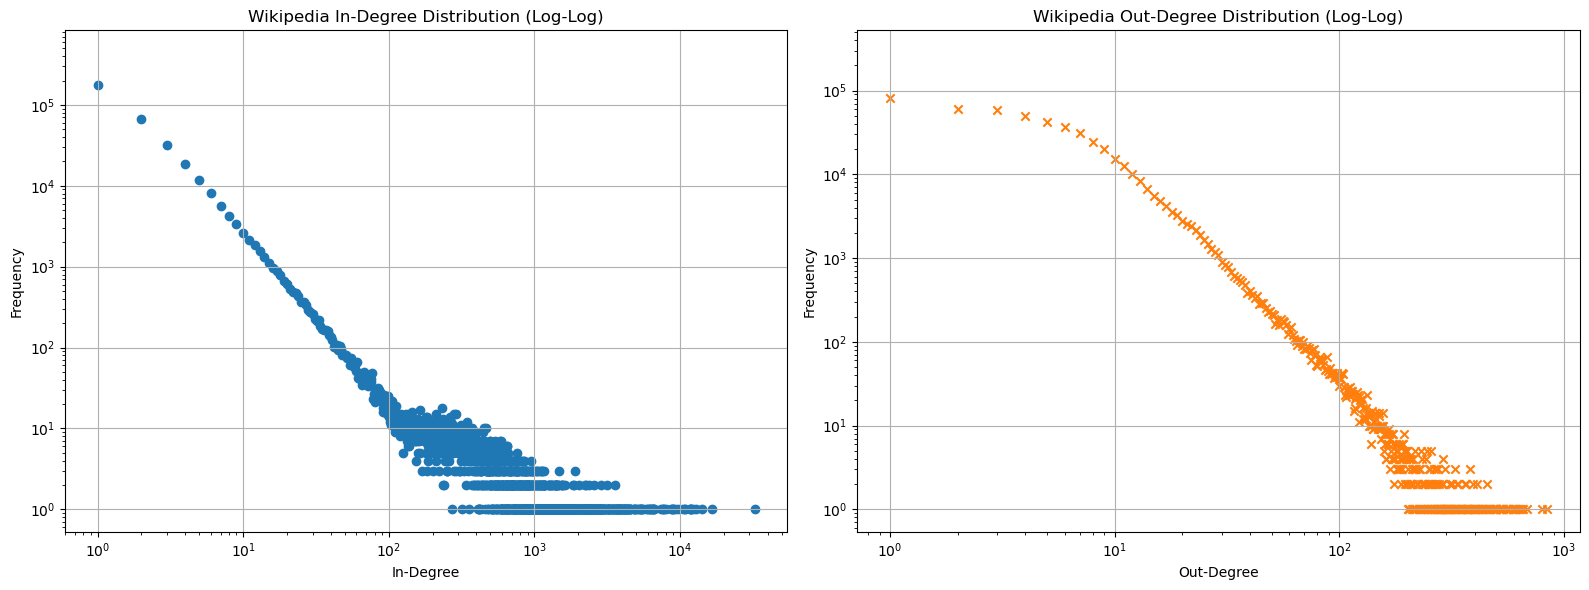

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(in_degree_counts.keys(), in_degree_counts.values(), color='tab:blue')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title("Wikipedia In-Degree Distribution (Log-Log)")
ax1.set_xlabel("In-Degree")
ax1.set_ylabel("Frequency")
ax1.grid(True)

ax2.scatter(out_degree_counts.keys(), out_degree_counts.values(), color='tab:orange', marker='x')
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_title("Wikipedia Out-Degree Distribution (Log-Log)")
ax2.set_xlabel("Out-Degree")
ax2.set_ylabel("Frequency")
ax2.grid(True)

plt.tight_layout()
plt.show()

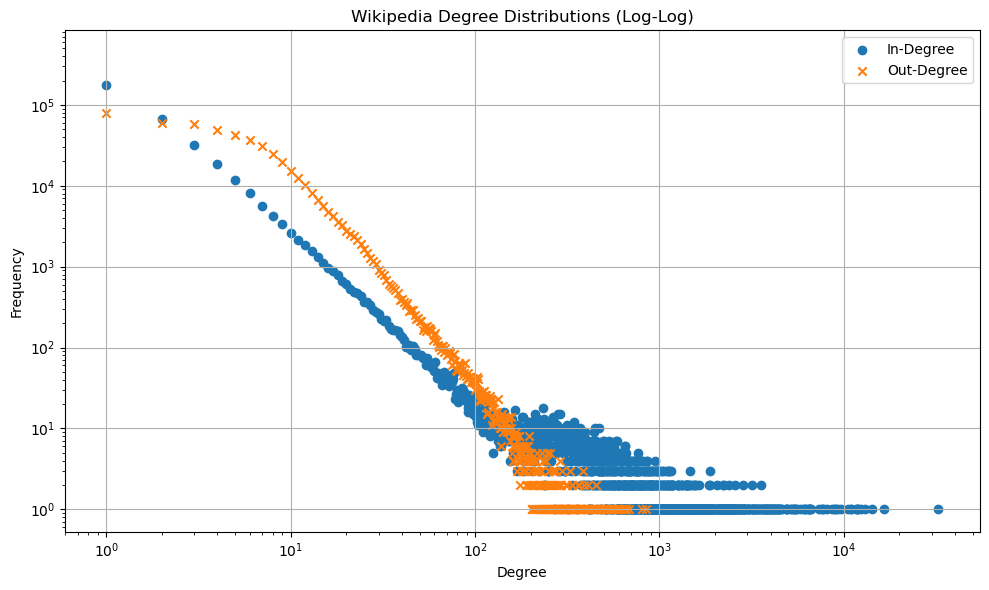

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot in-degree (blue)
ax.scatter(in_degree_counts.keys(), in_degree_counts.values(), color='tab:blue', marker='o', label='In-Degree')

# Plot out-degree (red)
ax.scatter(out_degree_counts.keys(), out_degree_counts.values(), color='tab:orange', marker='x', label='Out-Degree')

# Set log scales
ax.set_xscale("log")
ax.set_yscale("log")

# Add labels and title
ax.set_title("Wikipedia Degree Distributions (Log-Log)")
ax.set_xlabel("Degree")
ax.set_ylabel("Frequency")
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

### Interpolation

In [5]:
# Model in-degree distribution
fit_in = powerlaw.Fit(in_degrees, discrete=True)
alpha_in = fit_in.power_law.alpha
sigma_in = fit_in.power_law.sigma
xmin_in = fit_in.power_law.xmin

print(f"In-degree power law parameters:")
print(f"α (exponent): {alpha_in:.3f} ± {sigma_in:.3f}")
print(f"x_min: {xmin_in}")

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
In-degree power law parameters:
α (exponent): 2.393 ± 0.037
x_min: 514.0


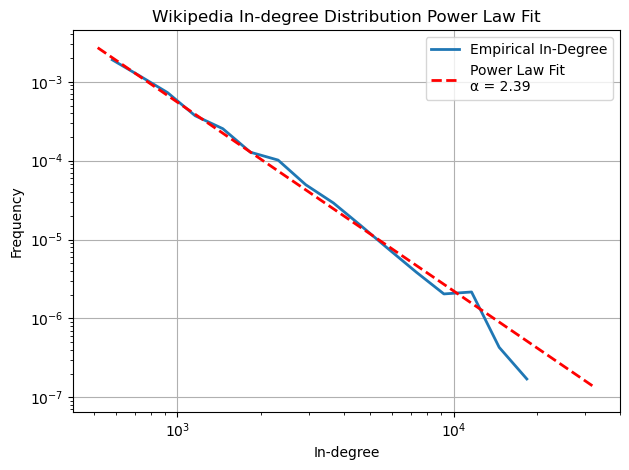

In [37]:
# Plot the empirical PDF
fig, ax = plt.subplots()

fit_in.plot_pdf(color='tab:blue', linewidth=2, label='Empirical In-Degree')
fit_in.power_law.plot_pdf(color='red', linestyle='--', linewidth=2, label=f'Power Law Fit\nα = {fit_in.power_law.alpha:.2f}')

# Plot formatting
ax.set_title('Wikipedia In-degree Distribution Power Law Fit')
ax.set_xlabel('In-degree')
ax.set_ylabel('Frequency')
ax.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
# Model out-degree distribution
fit_out = powerlaw.Fit(out_degrees, discrete=True)
alpha_in = fit_out.power_law.alpha
sigma_in = fit_out.power_law.sigma
xmin_in = fit_out.power_law.xmin

print(f"Out-degree power law parameters:")
print(f"α (exponent): {alpha_in:.3f} ± {sigma_in:.3f}")
print(f"x_min: {xmin_in}")

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
In-degree power law parameters:
α (exponent): 2.901 ± 0.011
x_min: 21.0


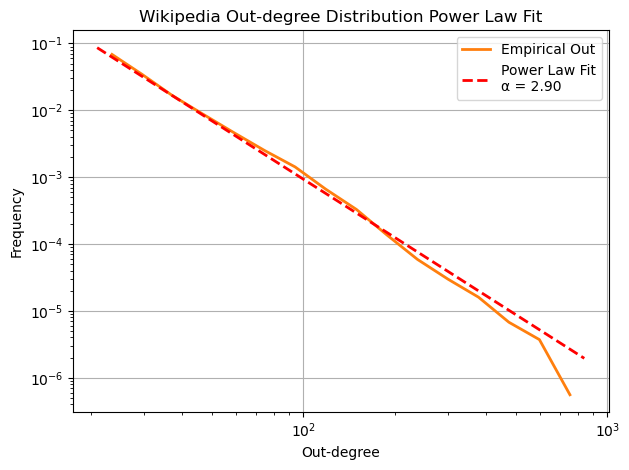

In [36]:
# Plot the empirical PDF
fig, ax = plt.subplots()

fit_out.plot_pdf(color='tab:orange', linewidth=2, label='Empirical Out')
fit_out.power_law.plot_pdf(color='red', linestyle='--', linewidth=2, label=f'Power Law Fit\nα = {fit_out.power_law.alpha:.2f}')

# Plot formatting
ax.set_title('Wikipedia Out-degree Distribution Power Law Fit')
ax.set_xlabel('Out-degree')
ax.set_ylabel('Frequency')
ax.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

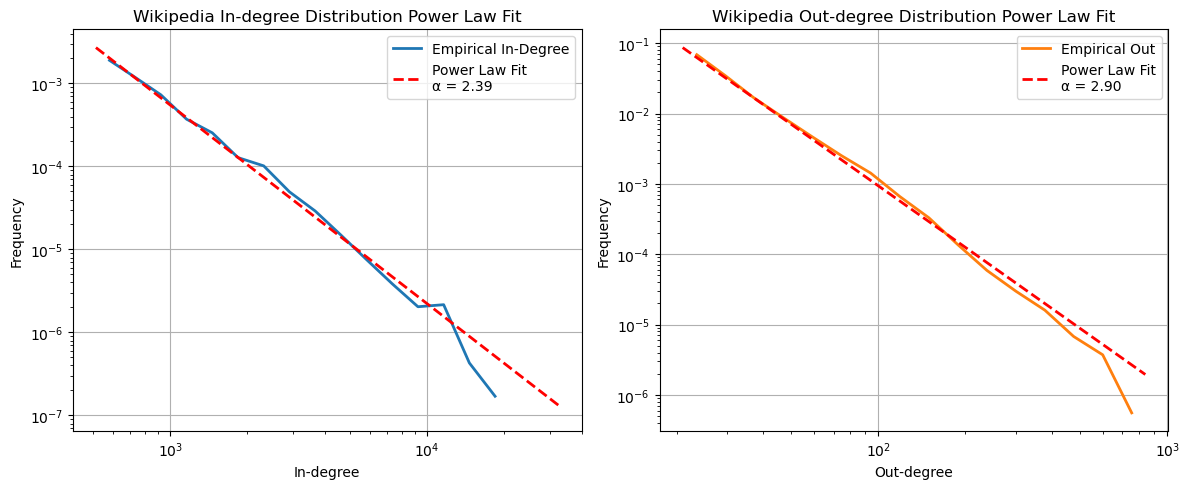

In [38]:
# Create a single figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# First plot (In-degree)
fit_in.plot_pdf(color='tab:blue', linewidth=2, label='Empirical In-Degree', ax=ax1)
fit_in.power_law.plot_pdf(color='red', linestyle='--', linewidth=2, 
                         label=f'Power Law Fit\nα = {fit_in.power_law.alpha:.2f}', ax=ax1)

# Plot formatting for first subplot
ax1.set_title('Wikipedia In-degree Distribution Power Law Fit')
ax1.set_xlabel('In-degree')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True)

# Second plot (Out-degree)
fit_out.plot_pdf(color='tab:orange', linewidth=2, label='Empirical Out', ax=ax2)
fit_out.power_law.plot_pdf(color='red', linestyle='--', linewidth=2, 
                          label=f'Power Law Fit\nα = {fit_out.power_law.alpha:.2f}', ax=ax2)

# Plot formatting for second subplot
ax2.set_title('Wikipedia Out-degree Distribution Power Law Fit')
ax2.set_xlabel('Out-degree')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()